#### <center>African Leadership University</center>

# <center>Rwanda Revenue Authority</center>

![alt text for screen readers](https://mucuruzi.com/wp-content/uploads/2019/05/Rwanda-Revenue-Authority-.png)

## <center>Data Analytics Challenge</center>
### <center>Prepared by<center>
### <center>Group Number 4</center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as mpplt
from IPython import display

# Required packages and version check

In [2]:
#Ensure import are correct
print(np.version.version)
print(pd.__version__)
print(plt.__version__)

1.19.2
1.1.3
3.3.2



  # Logo Header

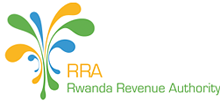

In [3]:
display.Image("./RR Logo.png")

# Methodlogy

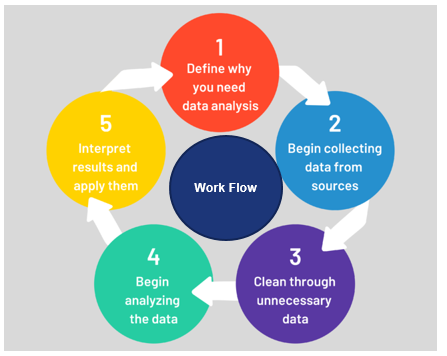

In [4]:
display.Image("./Methodology.PNG")

# Reading email supplied data

In [5]:
df1 = pd.read_csv('DP_LIVE_17022021201836306.csv',delim_whitespace=True)

In [6]:
print(df1.head())

  LOCATION INDICATOR SUBJECT MEASURE FREQUENCY  TIME   Value  Flag  Codes
0      AUS    TAXREV     TOT  PC_GDP         A  2000  30.458   NaN    NaN
1      AUS    TAXREV     TOT  PC_GDP         A  2001  28.927   NaN    NaN
2      AUS    TAXREV     TOT  PC_GDP         A  2002  29.800   NaN    NaN
3      AUS    TAXREV     TOT  PC_GDP         A  2003  29.963   NaN    NaN
4      AUS    TAXREV     TOT  PC_GDP         A  2004  30.271   NaN    NaN


In [7]:
print(df1.dtypes)

LOCATION      object
INDICATOR     object
SUBJECT       object
MEASURE       object
FREQUENCY     object
TIME           int64
Value        float64
Flag         float64
Codes        float64
dtype: object


# Cleaning data

In [8]:
df1.drop(['Flag','Codes'],axis=1)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
0,AUS,TAXREV,TOT,PC_GDP,A,2000,30.458
1,AUS,TAXREV,TOT,PC_GDP,A,2001,28.927
2,AUS,TAXREV,TOT,PC_GDP,A,2002,29.800
3,AUS,TAXREV,TOT,PC_GDP,A,2003,29.963
4,AUS,TAXREV,TOT,PC_GDP,A,2004,30.271
...,...,...,...,...,...,...,...
753,COL,TAXREV,TOT,PC_GDP,A,2015,19.903
754,COL,TAXREV,TOT,PC_GDP,A,2016,19.079
755,COL,TAXREV,TOT,PC_GDP,A,2017,18.983
756,COL,TAXREV,TOT,PC_GDP,A,2018,19.302


# Importing DataSet 2

In [9]:
df2 = pd.read_excel("revenue-allocation-kenya.xlsx")

In [10]:
print(df2.head())

  Unnamed: 0 Equitable Share Total Allocations  Allocation\rRatio  \
0     County      FY 2018/19        FY 2019/20                NaN   
1    Baringo      4940384400        5778725715               1.62   
2      Bomet      5763781800        6680554474               1.89   
3    Bungoma      8691417000        9998082441               2.85   
4      Busia      5794278000        6744720378               1.90   

  Level-5 Hospitals  Compensation for\ruser fees foregone  \
0               NaN                                   NaN   
1                 -                            13191000.0   
2                 -                            16713356.0   
3                 -                            32837307.0   
4                 -                            16934085.0   

   Rehabiliation of\rVillage Polytechnics  Road Maintenance\rLevy Fund  \
0                                     NaN                          NaN   
1                              35605000.0                  145541813.0

#### Lacked understanding of supplied data set thus sourced an alternative 

# Self sourced data import

#### Sourcelink: https://stats.oecd.org/Index.aspx?DataSetCode=REVZAF

In [122]:
df3 = pd.read_csv('REVZAF_18022021130539843.csv')

In [123]:
print(df3.head(100))

      TAX                                   Revenue category  GOV  \
0   TOTAL                      Total tax and non-tax revenue  FED   
1   TOTAL                      Total tax and non-tax revenue  FED   
2   TOTAL                      Total tax and non-tax revenue  FED   
3   TOTAL                      Total tax and non-tax revenue  FED   
4   TOTAL                      Total tax and non-tax revenue  FED   
..    ...                                                ...  ...   
95   1100  1100 Taxes on income, profits and capital gain...  FED   
96   1100  1100 Taxes on income, profits and capital gain...  FED   
97   1100  1100 Taxes on income, profits and capital gain...  FED   
98   1100  1100 Taxes on income, profits and capital gain...  FED   
99   1100  1100 Taxes on income, profits and capital gain...  FED   

              Level of government   YEA  Year       Value  Flag Codes  Flags  
0   Federal or Central government  1990  1990   71355.622         NaN    NaN  
1   Federal o

In [124]:
for col in df3.columns: 
    print(col) 

TAX
Revenue category
GOV
Level of government
YEA
Year
Value
Flag Codes
Flags


 # STAGE 3DATA CLEANING, PREPARATION, DATA TRANSFORMATION AND INTERGRATION

#### Removing whiteSpace from col name

In [125]:
df3 = df3.rename(columns={'Level of government':'LevelOfGovernment','Revenue category':'RevenueCategory'})

#### Droping redundant col's

In [126]:
df3 = df3.drop(columns=['Flags','Flag Codes'])

In [127]:
for col in df3.columns: 
    print(col) 

TAX
RevenueCategory
GOV
LevelOfGovernment
YEA
Year
Value


#### Assigning list with distinct descriptive col

In [128]:
taxCode =  df3.TAX.unique()

In [129]:
taxDesc = df3.RevenueCategory.unique()

In [130]:

govLevel= df3.GOV.unique()

In [131]:
#A Duplicte of col.Year
df3.YEA.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [132]:
df3 = df3.drop(columns=['YEA'])

In [133]:

yearRange = df3.Year.unique()

In [134]:
govDesc = df3.LevelOfGovernment.unique()

In [135]:
#value is in millions of ZAR
df3 = df3.rename(columns={'Value':'MillionZAR'})

In [136]:
#df3 is a dataframe containing annual tax revenue in ZAR millions per year, between 1990 and 2018

In [137]:
for col in df3.columns: 
    print(col) 

TAX
RevenueCategory
GOV
LevelOfGovernment
Year
MillionZAR


#### Confirming clean data

In [138]:
print(df3.shape)

(5362, 6)


In [139]:
print(df3.dtypes)

TAX                   object
RevenueCategory       object
GOV                   object
LevelOfGovernment     object
Year                   int64
MillionZAR           float64
dtype: object


In [140]:
print(df3.duplicated().value_counts())

False    5362
dtype: int64


In [141]:
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5362 entries, 0 to 5361
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TAX                5362 non-null   object 
 1   RevenueCategory    5362 non-null   object 
 2   GOV                5362 non-null   object 
 3   LevelOfGovernment  5362 non-null   object 
 4   Year               5362 non-null   int64  
 5   MillionZAR         5362 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 251.5+ KB
None


In [142]:
print(df3.describe())

              Year    MillionZAR
count  5362.000000  5.362000e+03
mean   2005.074226  3.599314e+04
std       8.202079  1.315448e+05
min    1990.000000 -1.015171e+03
25%    1998.000000  0.000000e+00
50%    2006.000000  2.059100e+01
75%    2012.000000  6.954673e+03
max    2018.000000  1.445120e+06


In [143]:
df3 = df3.replace('-',0) 

# EXPLORATORY DATA ANALYSIS (EDA)

In [144]:
print(df3)

            TAX                         RevenueCategory  GOV  \
0         TOTAL           Total tax and non-tax revenue  FED   
1         TOTAL           Total tax and non-tax revenue  FED   
2         TOTAL           Total tax and non-tax revenue  FED   
3         TOTAL           Total tax and non-tax revenue  FED   
4         TOTAL           Total tax and non-tax revenue  FED   
...         ...                                     ...  ...   
5357  TOTALNTNG  Total non-tax revenue excluding grants  FED   
5358  TOTALNTNG  Total non-tax revenue excluding grants  FED   
5359  TOTALNTNG  Total non-tax revenue excluding grants  FED   
5360  TOTALNTNG  Total non-tax revenue excluding grants  FED   
5361  TOTALNTNG  Total non-tax revenue excluding grants  FED   

                  LevelOfGovernment  Year  MillionZAR  
0     Federal or Central government  1990   71355.622  
1     Federal or Central government  1991   77128.129  
2     Federal or Central government  1992   81330.224  
3     F

In [145]:
df3 = df3[df3["TAX"]=="TOTAL"]

In [146]:
print(df3)

        TAX                RevenueCategory    GOV  \
0     TOTAL  Total tax and non-tax revenue    FED   
1     TOTAL  Total tax and non-tax revenue    FED   
2     TOTAL  Total tax and non-tax revenue    FED   
3     TOTAL  Total tax and non-tax revenue    FED   
4     TOTAL  Total tax and non-tax revenue    FED   
...     ...                            ...    ...   
4201  TOTAL  Total tax and non-tax revenue  STATE   
4202  TOTAL  Total tax and non-tax revenue  STATE   
4203  TOTAL  Total tax and non-tax revenue  STATE   
4204  TOTAL  Total tax and non-tax revenue  STATE   
4205  TOTAL  Total tax and non-tax revenue  STATE   

                  LevelOfGovernment  Year  MillionZAR  
0     Federal or Central government  1990   71355.622  
1     Federal or Central government  1991   77128.129  
2     Federal or Central government  1992   81330.224  
3     Federal or Central government  1993   93248.899  
4     Federal or Central government  1994  109752.401  
...                        

In [147]:
print(df3[df3["GOV"]=="FED"])

      TAX                RevenueCategory  GOV              LevelOfGovernment  \
0   TOTAL  Total tax and non-tax revenue  FED  Federal or Central government   
1   TOTAL  Total tax and non-tax revenue  FED  Federal or Central government   
2   TOTAL  Total tax and non-tax revenue  FED  Federal or Central government   
3   TOTAL  Total tax and non-tax revenue  FED  Federal or Central government   
4   TOTAL  Total tax and non-tax revenue  FED  Federal or Central government   
5   TOTAL  Total tax and non-tax revenue  FED  Federal or Central government   
6   TOTAL  Total tax and non-tax revenue  FED  Federal or Central government   
7   TOTAL  Total tax and non-tax revenue  FED  Federal or Central government   
8   TOTAL  Total tax and non-tax revenue  FED  Federal or Central government   
9   TOTAL  Total tax and non-tax revenue  FED  Federal or Central government   
10  TOTAL  Total tax and non-tax revenue  FED  Federal or Central government   
11  TOTAL  Total tax and non-tax revenue

### Get X Axis

In [148]:

xAxis = yearRange
print(xAxis)


[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018]


In [149]:
yAxisPre = df3[df3["GOV"]=="FED"]
yAxis = yAxisPre["MillionZAR"]

print(yAxis)

0       71355.622
1       77128.129
2       81330.224
3       93248.899
4      109752.401
5      124783.794
6      144974.808
7      162151.283
8      183739.098
9      200049.896
10     215695.752
11     252687.901
12     283859.437
13     297265.677
14     339376.904
15     404001.905
16     486578.721
17     574563.595
18     637283.214
19     617846.954
20     673898.460
21     762331.170
22     828529.513
23     913473.027
24     999342.990
25    1116938.035
26    1182868.027
27    1252345.592
28    1346066.060
Name: MillionZAR, dtype: float64


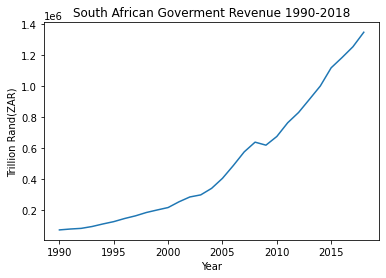

In [157]:
mpplt.plot(xAxis,yAxis)
mpplt.title("South African Goverment Revenue 1990-2018")
mpplt.xlabel("Year")
mpplt.ylabel("Trillion Rand(ZAR)")
mpplt.show()

# Data Visualization

In [169]:
%%capture
! pip install seaborn


In [170]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [176]:
# Update rows with Zeros to Numpy NaN to avid misscalculations
df3["MillionZAR"].replace(0, np.nan, inplace = True)


In [184]:
# delete rows missing the data
df3.dropna(subset=["MillionZAR"], axis=0, inplace=True)

<p>GOV column contains variables that describe a 'characteristic' of the tax, and are selected from a small group of tax categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.</p>

<p>Box plot below tries to visualise the relationship between the Amount of tax in MillionZAR column and GOV column that contains tax category</p>

<AxesSubplot:xlabel='GOV', ylabel='MillionZAR'>

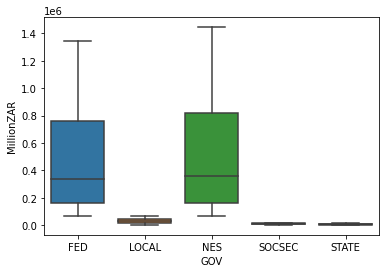

In [185]:
sns.boxplot(x="GOV", y="MillionZAR", data=df3)

<p>By observing the graph above, it is visually obsious that taxes in GOV category of FED and NES GOV tends to have higher income tax compared to LOCAL,SOCSEC and STATE columns</p>

In [189]:
df3['GOV'].unique()

array(['FED', 'LOCAL', 'NES', 'SOCSEC', 'STATE'], dtype=object)

In [198]:
df3_group=df3[['GOV','Year','MillionZAR']]

In [200]:
df3_group= df3_group.groupby(['GOV'],as_index=False).mean()

In [201]:
df3_group

,GOV,MillionZAR
0,FED,497705.761655
1,LOCAL,31956.462625
2,NES,526351.358448
3,SOCSEC,11605.130235
4,STATE,7633.230813


<h4>The above shows the average income tax generated by each GOV category</h4>

<li>

In [210]:
df3_group2 = df3[['GOV','Year','MillionZAR']]
df3_group2 = df3_group2.groupby(['Year','GOV'],as_index=False).mean()
df3_group2

,Year,GOV,MillionZAR
0,1990,FED,71355.622
1,1990,NES,71355.622
2,1991,FED,77128.129
3,1991,NES,77128.129
4,1992,FED,81330.224
...,...,...,...
102,2018,FED,1346066.060
103,2018,LOCAL,65786.253
104,2018,NES,1445120.017
105,2018,SOCSEC,19163.324


In [216]:
df3_group2_piv=df3_group2.pivot(index='GOV',columns='Year')
df3_group2_piv

MillionZAR                                                           \
Year         1990       1991       1992       1993        1994        1995   
GOV                                                                          
FED     71355.622  77128.129  81330.224  93248.899  109752.401  124783.794   
LOCAL         NaN        NaN        NaN        NaN         NaN         NaN   
NES     71355.622  77128.129  81330.224  93248.899  109752.401  124783.794   
SOCSEC        NaN        NaN        NaN        NaN         NaN         NaN   
STATE         NaN        NaN        NaN        NaN         NaN         NaN   

                                                        ...              \
Year          1996        1997        1998        1999  ...        2009   
GOV                                                     ...               
FED     144974.808  162151.283  183739.098  200049.896  ...  617846.954   
LOCAL          NaN         NaN         NaN         NaN  ...   27190.198   
NES     144974.808  162151.283  183739.098  200049.896  ...  661204.953   
SOCSEC         NaN         NaN         NaN         NaN  ...   10593.801   
STATE          NaN         NaN         NaN         NaN  ...    5574.000   

                                                                     \
Year          2010        2011        2012        2013         2014   
GOV                                                                   
FED     673898.460  762331.170  828529.513  913473.027   999342.990   
LOCAL    31041.006   33983.790   38150.080   41421.242    46290.893   
NES     722579.344  816282.132  889272.644  978404.065  1070731.146   
SOCSEC   10974.633   12265.501   14087.526   14188.058    15599.288   
STATE     6665.246    7701.671    8505.525    9321.739     9497.974   

                                                            
Year           2015         2016         2017         2018  
GOV                                                         
FED     1116938.035  1182868.027  1252345.592  1346066.060  
LOCAL     44617.900    51667.700    58731.715    65786.253  
NES     1188804.073  1263007.191  1342691.162  1445120.017  
SOCSEC    17139.339    17787.365    18652.196    19163.324  
STATE     10108.800    10684.100    12961.659    14104.379  

[5 rows x 29 columns]

<h4>The pivot table above shows the average income tax generated each GOV column category over the years</h4>

<p>To avoid future errors in the analysis the NaN values will be converted into Zeros</p>

In [221]:
df3_group2_piv = df3_group2_piv.fillna(0)
df3_group2_piv

MillionZAR                                                           \
Year         1990       1991       1992       1993        1994        1995   
GOV                                                                          
FED     71355.622  77128.129  81330.224  93248.899  109752.401  124783.794   
LOCAL       0.000      0.000      0.000      0.000       0.000       0.000   
NES     71355.622  77128.129  81330.224  93248.899  109752.401  124783.794   
SOCSEC      0.000      0.000      0.000      0.000       0.000       0.000   
STATE       0.000      0.000      0.000      0.000       0.000       0.000   

                                                        ...              \
Year          1996        1997        1998        1999  ...        2009   
GOV                                                     ...               
FED     144974.808  162151.283  183739.098  200049.896  ...  617846.954   
LOCAL        0.000       0.000       0.000       0.000  ...   27190.198   
NES     144974.808  162151.283  183739.098  200049.896  ...  661204.953   
SOCSEC       0.000       0.000       0.000       0.000  ...   10593.801   
STATE        0.000       0.000       0.000       0.000  ...    5574.000   

                                                                     \
Year          2010        2011        2012        2013         2014   
GOV                                                                   
FED     673898.460  762331.170  828529.513  913473.027   999342.990   
LOCAL    31041.006   33983.790   38150.080   41421.242    46290.893   
NES     722579.344  816282.132  889272.644  978404.065  1070731.146   
SOCSEC   10974.633   12265.501   14087.526   14188.058    15599.288   
STATE     6665.246    7701.671    8505.525    9321.739     9497.974   

                                                            
Year           2015         2016         2017         2018  
GOV                                                         
FED     1116938.035  1182868.027  1252345.592  1346066.060  
LOCAL     44617.900    51667.700    58731.715    65786.253  
NES     1188804.073  1263007.191  1342691.162  1445120.017  
SOCSEC    17139.339    17787.365    18652.196    19163.324  
STATE     10108.800    10684.100    12961.659    14104.379  

[5 rows x 29 columns]

<p>To visualize the pivot table above, we used heatmaps. Heatmap is a great tool to visualise dense data.</p>

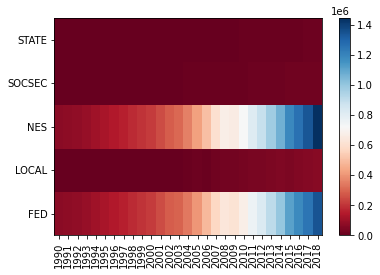

In [223]:
fig, ax = plt.subplots()
im = ax.pcolor(df3_group2_piv, cmap='RdBu')

#label names
row_labels = df3_group2_piv.columns.levels[1]
col_labels = df3_group2_piv.index

#move ticks and labels to the center
ax.set_xticks(np.arange(df3_group2_piv.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df3_group2_piv.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<h4>The heat map above shows four different insights</h4>
<ul>
    <li>First, SOCSEC and FED in GOV columns, brings in the highest tx revenues in all time frame</li>
    <li>Revenues of all categores increase with time. Especially FED and SOCSEC</li>
    <li>The data available are from 1990 to 2018 and there are Five distinct GOV categories</li>
</ur>

<hr>